First, make sure you can load, read and show an image from the dataset.

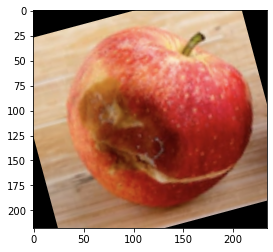

In [5]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt

#Import image
image = cv.imread("./dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.50.52 PM.png")

#Show the image with matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

Try to isolate this apple, let's remove the background using GrabCut algorithm.

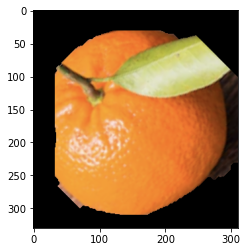

In [6]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

#Import image
image = cv.imread("./dataset/test/freshoranges/rotated_by_45_Screen Shot 2018-06-13 at 12.01.49 AM.png")

def grab(image):
    #Create a center of interest rectangle
    margin = .1
    (image_width, image_height, channels) = image.shape
    rect = (int(margin*image_width),int(margin*image_height),int((1-margin)*image_width),int((1-margin)*image_height))

    #Execute grab cut
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    return image*mask2[:,:,np.newaxis]

#Show the image with matplotlib
plt.imshow(cv.cvtColor(grab(image), cv.COLOR_BGR2RGB))
plt.show()

Now, let's compate fresh orange histograms vs rotten orange histograms.

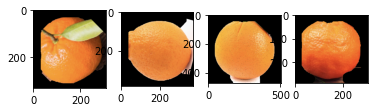

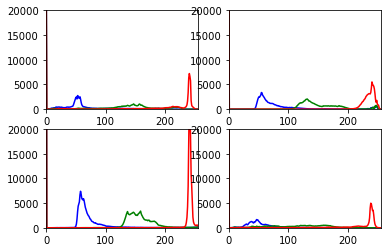

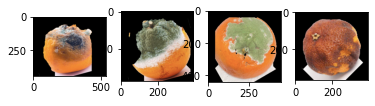

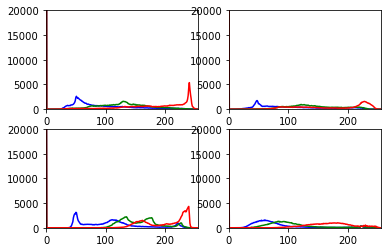

In [7]:
#Show histogram
color = ('b','g','r')
def show_hist(image):
    for i,col in enumerate(color):
        histr = cv.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.ylim([0,20000])

### FRESH ORANGES

#Import fresh orange images
image1 = grab(cv.imread("./dataset/test/freshoranges/rotated_by_45_Screen Shot 2018-06-13 at 12.01.49 AM.png"))
image2 = grab(cv.imread("./dataset/test/freshoranges/rotated_by_75_Screen Shot 2018-06-13 at 12.18.40 AM.png"))
image3 = grab(cv.imread("./dataset/test/freshoranges/saltandpepper_Screen Shot 2018-06-12 at 11.55.05 PM.png"))
image4 = grab(cv.imread("./dataset/test/freshoranges/Screen Shot 2018-06-13 at 12.09.14 AM.png"))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()

plt.subplot(221)
show_hist(image1)
plt.subplot(222)
show_hist(image2)
plt.subplot(223)
show_hist(image3)
plt.subplot(224)
show_hist(image4)
plt.show()

### ROTTEN ORANGES

#Import rotten orange images
image1 = grab(cv.imread("./dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.19.01 PM.png"))
image2 = grab(cv.imread("./dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.37.13 PM.png"))
image3 = grab(cv.imread("./dataset/test/rottenoranges/rotated_by_30_Screen Shot 2018-06-12 at 11.32.13 PM.png"))
image4 = grab(cv.imread("./dataset/test/rottenoranges/rotated_by_45_Screen Shot 2018-06-12 at 11.42.56 PM.png"))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()

plt.subplot(221)
show_hist(image1)
plt.subplot(222)
show_hist(image2)
plt.subplot(223)
show_hist(image3)
plt.subplot(224)
show_hist(image4)
plt.show()

Notice : looks like rotten orange have wider red and green histograms than fresh orange ones.

fresh image1 average 90.4479082301315
fresh image2 average 89.6535795734025
fresh image3 average 99.94198557022911
fresh image4 average 104.10094603311116


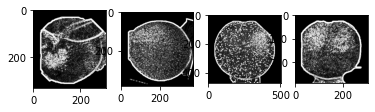

rotten image1 average 119.88003034006152
rotten image2 average 149.55344637999883
rotten image3 average 99.30733989377156
rotten image4 average 154.6970816605638


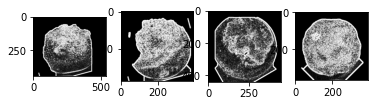

In [21]:
threshold = 1

def abs_dst(image):
    ddepth = cv.CV_16S
    kernel_size = 5
    window_name = "Laplace"
    # Remove noise by blurring with a Gaussian filter
    image_blur = cv.GaussianBlur(image, (3, 3), 0)
    # Convert the image to grayscale
    image_gray = cv.cvtColor(image_blur, cv.COLOR_BGR2GRAY)
    # Apply Laplace function
    dst = cv.Laplacian(image_gray, ddepth, ksize=kernel_size)
    # converting back to uint8
    return cv.convertScaleAbs(dst)

def get_score(image):
    arr = np.asarray(image).flatten()
    filter_arr = arr > threshold
    newarr = arr[filter_arr]
    return newarr.mean()

### FRESH ORANGES

#Import fresh orange images
image1 = abs_dst(grab(cv.imread("./dataset/test/freshoranges/rotated_by_45_Screen Shot 2018-06-13 at 12.01.49 AM.png")))
image2 = abs_dst(grab(cv.imread("./dataset/test/freshoranges/rotated_by_75_Screen Shot 2018-06-13 at 12.18.40 AM.png")))
image3 = abs_dst(grab(cv.imread("./dataset/test/freshoranges/saltandpepper_Screen Shot 2018-06-12 at 11.55.05 PM.png")))
image4 = abs_dst(grab(cv.imread("./dataset/test/freshoranges/Screen Shot 2018-06-13 at 12.09.14 AM.png")))

print("fresh image1 average", get_score(image1))
print("fresh image2 average", get_score(image2))
print("fresh image3 average", get_score(image3))
print("fresh image4 average", get_score(image4))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()

### ROTTEN ORANGES

#Import rotten orange images
image1 = abs_dst(grab(cv.imread("./dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.19.01 PM.png")))
image2 = abs_dst(grab(cv.imread("./dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.37.13 PM.png")))
image3 = abs_dst(grab(cv.imread("./dataset/test/rottenoranges/rotated_by_30_Screen Shot 2018-06-12 at 11.32.13 PM.png")))
image4 = abs_dst(grab(cv.imread("./dataset/test/rottenoranges/rotated_by_45_Screen Shot 2018-06-12 at 11.42.56 PM.png")))

print("rotten image1 average", get_score(image1))
print("rotten image2 average", get_score(image2))
print("rotten image3 average", get_score(image3))
print("rotten image4 average", get_score(image4))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()